# Analysing Garmin Data

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing Garmin Data

Due to strava currently not having the ability to recieve average cadence from runs, data from my running watch via Garmin Connect is used instead.

To download your garmin profile activites there is a great script here:
[garmin-connect-export script](https://github.com/pe-st/garmin-connect-export/)

Unfortunately due to my running watch being fairly new, combined with recovering from Covid/too many isolations to count/Summer hols there isn't much data !!! I will build on it when I get make to running properly as the new Uni term starts.

The garmin watch isn't very accurate at measuring running cadence so there are outliers in the data (I think). To improve this cadence tracking devices can be bought!

In [18]:
df_activities = pd.read_csv('./garmin-connect-export-3.2.1/2021-09-01_garmin_connect_export/activities.csv')
#the folder directory of my garmin csv file
df_activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Start Time                             61 non-null     object 
 1   End Time                               61 non-null     object 
 2   Activity ID                            61 non-null     int64  
 3   Activity Name                          61 non-null     object 
 4   Description                            0 non-null      float64
 5   Location Name                          60 non-null     object 
 6   Time Zone                              61 non-null     object 
 7   Offset                                 61 non-null     object 
 8   Duration (h:m:s)                       61 non-null     object 
 9   Elapsed Duration (h:m:s)               61 non-null     object 
 10  Moving Duration (h:m:s)                60 non-null     object 
 11  Activity

In [19]:
df_activities.head()

,Start Time,End Time,Activity ID,Activity Name,Description,Location Name,Time Zone,Offset,Duration (h:m:s),Elapsed Duration (h:m:s),...,Avg. Run Cadence,Max. Run Cadence,Stride Length,Steps,Avg. Cadence (rpm),Max. Cadence (rpm),Strokes,Avg. Temp (Â°C),Min. Temp (Â°C),Max. Temp (Â°C)
0,2021-08-28T06:36:22+01:00,2021-08-28T15:51:29+01:00,7386127772,Southampton Cycling,NaN,Southampton,Europe/London,+01:00,05:09:25,09:15:07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-26T13:53:17+01:00,2021-08-26T16:50:38+01:00,7374120181,Southampton Cycling,NaN,Southampton,Europe/London,+01:00,01:56:55,02:57:21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-25T11:21:37+01:00,2021-08-25T13:01:34+01:00,7369613058,Southampton Cycling,NaN,Southampton,Europe/London,+01:00,01:32:53,01:39:57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-22T09:09:19+01:00,2021-08-22T13:02:11+01:00,7349492877,Southampton Cycling,NaN,Southampton,Europe/London,+01:00,02:32:21,03:52:52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-07-26T20:21:21+01:00,2021-07-26T20:43:18+01:00,7194590649,Southampton Running,NaN,Southampton,Europe/London,+01:00,00:21:20,00:21:57,...,171.31,230.0,137.07,3644.0,NaN,NaN,NaN,NaN,NaN,NaN


## Extracting Running Data

In [20]:
df_running = df_activities[df_activities['Activity Type'] == 'Running'] #creates dataframe of only running data
df_running.head()

,Start Time,End Time,Activity ID,Activity Name,Description,Location Name,Time Zone,Offset,Duration (h:m:s),Elapsed Duration (h:m:s),...,Avg. Run Cadence,Max. Run Cadence,Stride Length,Steps,Avg. Cadence (rpm),Max. Cadence (rpm),Strokes,Avg. Temp (Â°C),Min. Temp (Â°C),Max. Temp (Â°C)
4,2021-07-26T20:21:21+01:00,2021-07-26T20:43:18+01:00,7194590649,Southampton Running,NaN,Southampton,Europe/London,+01:00,00:21:20,00:21:57,...,171.31,230.0,137.07,3644.0,NaN,NaN,NaN,NaN,NaN,NaN
17,2021-05-07T09:05:46+01:00,2021-05-07T11:02:38+01:00,6736651597,New Forest Running,NaN,New Forest,Europe/London,+01:00,01:55:08,01:56:52,...,172.95,206.0,105.49,19988.0,NaN,NaN,NaN,NaN,NaN,NaN
18,2021-05-03T16:41:07+01:00,2021-05-03T17:00:13+01:00,6716678668,Southampton Running,NaN,Southampton,Europe/London,+01:00,00:18:53,00:19:06,...,168.28,220.0,110.30,3190.0,NaN,NaN,NaN,NaN,NaN,NaN
19,2021-04-26T18:12:31+01:00,2021-04-26T18:33:19+01:00,6676999033,Southampton Running,NaN,Southampton,Europe/London,+01:00,00:20:10,00:20:48,...,176.64,229.0,140.65,3542.0,NaN,NaN,NaN,NaN,NaN,NaN
20,2021-04-20T15:55:41+01:00,2021-04-20T16:17:44+01:00,6640539962,Southampton Running,NaN,Southampton,Europe/London,+01:00,00:21:27,00:22:03,...,175.27,219.0,133.31,3742.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
print('{} Max Avg Run Cadence'.format(df_running['Avg. Run Cadence'].max()))
print('{} Min Avg Run Cadence'.format(df_running['Avg. Run Cadence'].min()))
print('{} Mean Avg Run Cadence'.format(df_running['Avg. Run Cadence'].mean()))

177.5 Max Avg Run Cadence
156.52 Min Avg Run Cadence
170.39157894736843 Mean Avg Run Cadence


In [22]:
df_running_speed = df_running.sort_values('Average Moving Speed (km/h or min/km)')
#sorts values from fastest average moving speed to slowest

In [23]:
df_running_speed['Average Moving Speed min/km'] = '00:' + df_running_speed['Average Moving Speed (km/h or min/km)']
df_running_speed['Average Moving Speed min/km'] = pd.to_datetime(df_running_speed['Average Moving Speed min/km'])
#converts object to datetime to allow accurate plots

## Exploratory Data Analysis

<AxesSubplot:xlabel='Average Moving Speed min/km', ylabel='Avg. Run Cadence'>

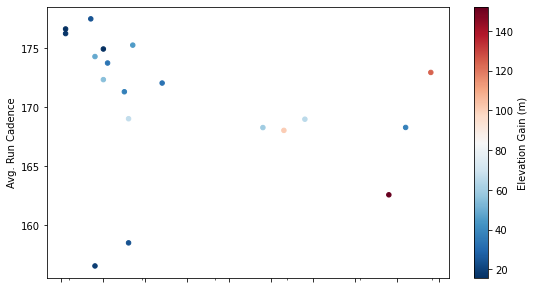

In [24]:
df_running_speed.plot.scatter(x='Average Moving Speed min/km', y='Avg. Run Cadence', c='Elevation Gain (m)', cmap='RdBu_r',
                             figsize=(9,5))

Initially I thought that maybe the fast times but low average cadence may be due to hillier running routes, but seeing from this graph I was wrong! (Southampton is very very flat too!!) I think these are mainly due to measuring issues from my watch so I have discarded them further on.

<AxesSubplot:xlabel='Average Moving Speed min/km', ylabel='Avg. Run Cadence'>

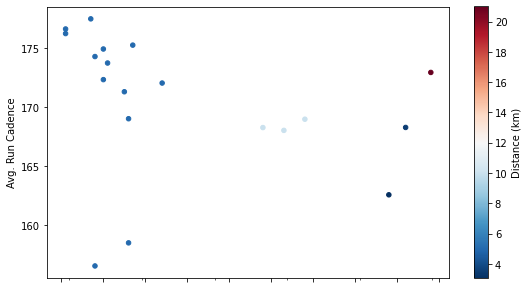

In [25]:
df_running_speed.plot.scatter(x='Average Moving Speed min/km', y='Avg. Run Cadence', c='Distance (km)', cmap='RdBu_r',
                             figsize=(9,5))

This graph is showing that I tend to run longer distances at a slower pace (as expected). The three dots in the middle are from when I tried to implement a running training plan, they're easy pace 10ks, as you can see I only managed 3 whoops.

(149.0, 180.0)

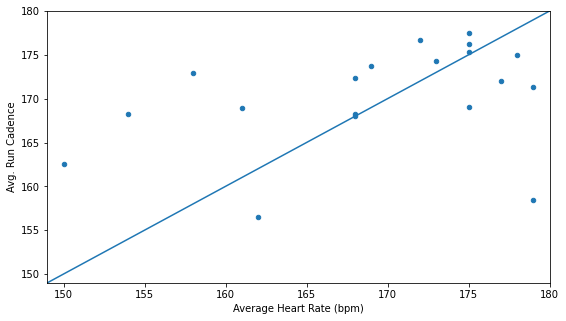

In [27]:
line = np.linspace(0, 180)
x_line = line

fig, ax = plt.subplots(figsize=(9,5))
df_running_speed.plot.scatter(x='Average Heart Rate (bpm)', y='Avg. Run Cadence', ax=ax)
ax.plot(line, x_line, zorder=-1)
ax.set_xlim([149, 180])
ax.set_ylim([149, 180])

This plot isn't very useful but it is interesting to see that sometimes my Average Heart Rate is the same as my Average Cadence (although the watches way of measuring both these values is very tenuous).

## Deciding on Optimal Running Cadence

The aim for this project is to improve my 5k times, ideally I want to reach the sub 20 5k, currenlty my PB is 20:05 so I am very close. I have also been trialling out barefoot shoes as I experience knee issues. For both these reasons it is ideal to improve the cadence of your run as well as your form (I aim to improve form on a future project).

Luckily for me I really enjoy DnB music, which ideally generally has a range of BPM 170-175, this matches up perfectly with my average cadence, as well as the recommend cadence range of 170-180 Steps Per Minute (SPM). I am also a big fan of Hardcore which has a high BPM too, this makes it easier for me to find tracks that I will like within the correct BPM range.

In [28]:
df_running_speed_optimal = df_running_speed[(df_running_speed['Average Moving Speed (km/h or min/km)'] <= '04:10') & \
                                            (df_running_speed['Avg. Run Cadence'] >= 165)] #165 removes the outliers
#this finds the cadence for my faster runs of 5k distance, which is what I am trying to improve

In [29]:
print('{} Max Avg Run Cadence'.format(df_running_speed_optimal['Avg. Run Cadence'].max()))
print('{} Min Avg Run Cadence'.format(df_running_speed_optimal['Avg. Run Cadence'].min()))
print('{} Mean Avg Run Cadence'.format(df_running_speed_optimal['Avg. Run Cadence'].mean()))

177.5 Max Avg Run Cadence
172.34 Min Avg Run Cadence
175.32833333333335 Mean Avg Run Cadence


In [30]:
lower_spm = int(df_running_speed_optimal['Avg. Run Cadence'].min())
upper_spm = int(df_running_speed_optimal['Avg. Run Cadence'].max())
print('{} My Measured Lower SPM'.format(lower_spm))
print('{} My Measured Upper SPM'.format(upper_spm))

172 My Measured Lower SPM
177 My Measured Upper SPM


Using these two values in the playlist creation script will make a new playlist that should be easy to run to, as well as make it easy to keep my cadence up. The current range is quite wide so as I try this new playlist and figure out my optimal cadence I can reduce this range to make the cadence hints more targeted.